# Wearable Device Health Risk Prediction Model

This notebook trains and evaluates models for predicting health risks from wearable device data.

## Objectives:
1. Load wearable device data
2. Train multiple model types (Random Forest, Gradient Boosting, Logistic Regression)
3. Evaluate and compare models
4. Save best model


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import warnings

# Add src to path
sys.path.append(str(Path().absolute().parent / "src"))

from models.wearable_model import WearableHealthRiskModel

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# Load data
data_dir = Path().absolute().parent / "data" / "raw"
wearable_file = data_dir / "wearable_data.csv"

df = pd.read_csv(wearable_file, parse_dates=['timestamp'])
print(f"✓ Loaded {len(df)} records")
print(f"Dataset shape: {df.shape}")
print(f"\nHealth conditions: {df['health_condition'].value_counts().to_dict()}")


✓ Loaded 3000 records
Dataset shape: (3000, 10)

Health conditions: {'normal': 2220, 'at_risk': 510, 'ill': 270}


In [ ]:
# Train multiple model types
model_types = ['random_forest', 'gradient_boosting', 'logistic_regression']
results = {}

for model_type in model_types:
    print(f"\n{'='*60}")
    print(f"Training {model_type.upper()}")
    print(f"{'='*60}")
    
    model = WearableHealthRiskModel(model_type=model_type)
    metrics = model.train(df, target_col='health_condition', test_size=0.2)
    
    results[model_type] = {
        'model': model,
        'metrics': metrics
    }



Training RANDOM_FOREST
Training random_forest model...

Model Performance:
Accuracy: 0.8833
Precision: 0.8757
Recall: 0.8833
F1-Score: 0.8765
ROC-AUC: 0.9337

Classification Report:
              precision    recall  f1-score   support

     at_risk       0.71      0.53      0.61       102
         ill       1.00      0.94      0.97        54
      normal       0.90      0.96      0.93       444

    accuracy                           0.88       600
   macro avg       0.87      0.81      0.84       600
weighted avg       0.88      0.88      0.88       600


Training GRADIENT_BOOSTING
Training gradient_boosting model...

Model Performance:
Accuracy: 0.8883
Precision: 0.8838
Recall: 0.8883
F1-Score: 0.8848
ROC-AUC: 0.9328

Classification Report:
              precision    recall  f1-score   support

     at_risk       0.70      0.60      0.65       102
         ill       1.00      0.91      0.95        54
      normal       0.91      0.95      0.93       444

    accuracy               

Model Comparison:
           random_forest  gradient_boosting  logistic_regression
Accuracy          0.8833             0.8883               0.8883
Precision         0.8757             0.8838               0.8817
Recall            0.8833             0.8883               0.8883
F1-Score          0.8765             0.8848               0.8825
ROC-AUC           0.9337             0.9328               0.9411


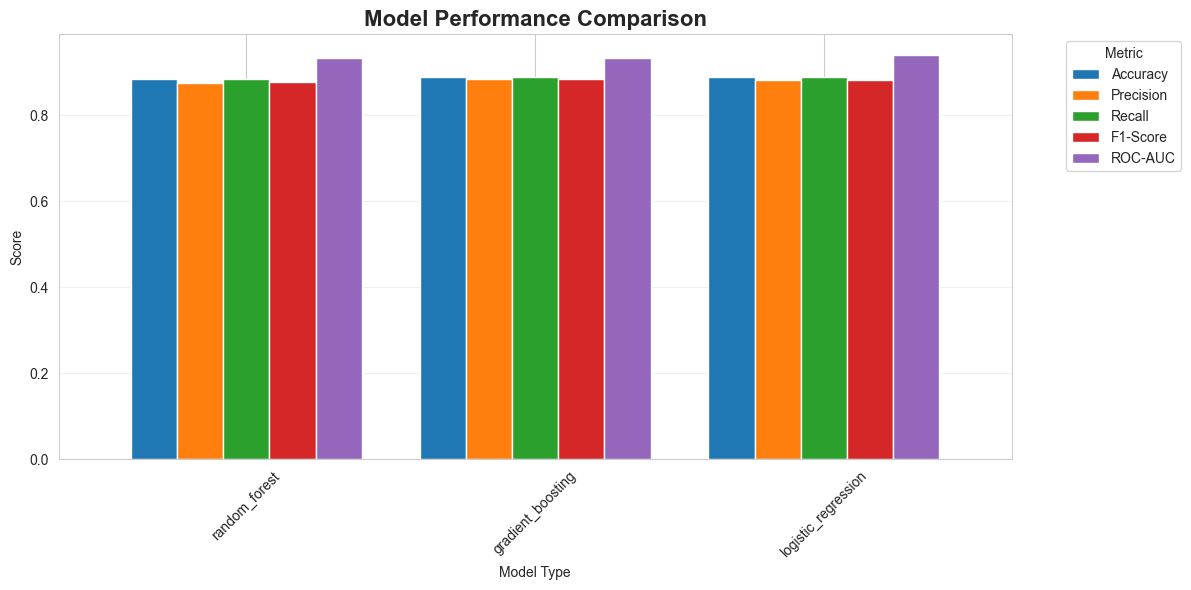

In [ ]:
# Compare models
comparison_df = pd.DataFrame({
    model_type: {
        'Accuracy': results[model_type]['metrics']['accuracy'],
        'Precision': results[model_type]['metrics']['precision'],
        'Recall': results[model_type]['metrics']['recall'],
        'F1-Score': results[model_type]['metrics']['f1_score'],
        'ROC-AUC': results[model_type]['metrics'].get('roc_auc', None)
    }
    for model_type in model_types
})

print("Model Comparison:")
print(comparison_df.round(4))

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))
comparison_df.T.plot(kind='bar', ax=ax, width=0.8)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model Type')
plt.ylabel('Score')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Select best model based on F1-score
best_model_type = max(model_types, key=lambda x: results[x]['metrics']['f1_score'])
best_model = results[best_model_type]['model']
best_metrics = results[best_model_type]['metrics']

print(f"\nBest Model: {best_model_type.upper()}")
print(f"F1-Score: {best_metrics['f1_score']:.4f}")
print(f"Accuracy: {best_metrics['accuracy']:.4f}")

# Save best model
models_dir = Path().absolute().parent / "models"
models_dir.mkdir(exist_ok=True)
model_path = models_dir / f"wearable_model_{best_model_type}.pkl"
best_model.save(str(model_path))
print(f"\n✓ Model saved to: {model_path}")



Best Model: GRADIENT_BOOSTING
F1-Score: 0.8848
Accuracy: 0.8883
Model saved to /Users/faiqahmed/Desktop/Semesters/Semester7/MLOPS/PROJECT/models/wearable_model_gradient_boosting.pkl

✓ Model saved to: /Users/faiqahmed/Desktop/Semesters/Semester7/MLOPS/PROJECT/models/wearable_model_gradient_boosting.pkl
